##### Anomaly Detection using KMeans

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

##### Create a sample dataset

In [3]:
# Step 1: Generate a sample dataset
x, labels = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)
x

array([[ 4.28576743e-01,  4.97399710e+00],
       [ 1.61990909e+00,  6.76452867e-02],
       [ 1.43289271e+00,  4.37679234e+00],
       [-1.57846247e+00,  3.03445802e+00],
       [-1.65862863e+00,  2.26746029e+00],
       [-1.52172727e+00,  3.23408479e+00],
       [ 8.36856841e-01,  2.13635938e+00],
       [ 2.41008767e-01,  4.81040511e+00],
       [-2.10320664e+00,  2.44201184e+00],
       [-4.83580407e-01,  3.51451890e+00],
       [ 8.93499638e-01,  1.01093082e+00],
       [ 2.39564169e+00,  7.64058600e-01],
       [ 3.04414848e+00,  9.96200313e-01],
       [ 1.24258802e+00,  4.50399192e+00],
       [ 1.89462740e+00,  2.20856861e-01],
       [-1.65707376e+00,  3.18511821e+00],
       [ 1.21767506e+00,  3.89290127e+00],
       [ 1.20212540e+00,  3.64414685e+00],
       [-1.32356154e+00,  4.13050840e+00],
       [ 1.34195197e+00,  5.93573847e-01],
       [-1.79041773e+00,  3.02668532e+00],
       [ 1.16411070e+00,  3.79132988e+00],
       [ 1.36085437e+00,  7.10288309e-01],
       [ 4.

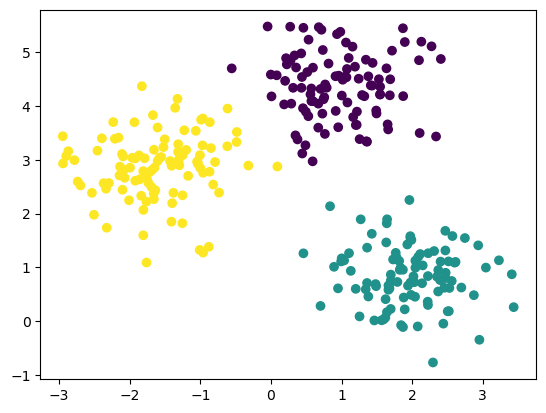

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=labels)

Add Anomalies

In [5]:
# Adding some random noise (anomalies)
np.random.seed(42)
n_anomalies = 20
anomalies = np.random.uniform(low=-10, high=10, size=(n_anomalies, 2))
x = np.vstack([x, anomalies])
x

array([[ 4.28576743e-01,  4.97399710e+00],
       [ 1.61990909e+00,  6.76452867e-02],
       [ 1.43289271e+00,  4.37679234e+00],
       [-1.57846247e+00,  3.03445802e+00],
       [-1.65862863e+00,  2.26746029e+00],
       [-1.52172727e+00,  3.23408479e+00],
       [ 8.36856841e-01,  2.13635938e+00],
       [ 2.41008767e-01,  4.81040511e+00],
       [-2.10320664e+00,  2.44201184e+00],
       [-4.83580407e-01,  3.51451890e+00],
       [ 8.93499638e-01,  1.01093082e+00],
       [ 2.39564169e+00,  7.64058600e-01],
       [ 3.04414848e+00,  9.96200313e-01],
       [ 1.24258802e+00,  4.50399192e+00],
       [ 1.89462740e+00,  2.20856861e-01],
       [-1.65707376e+00,  3.18511821e+00],
       [ 1.21767506e+00,  3.89290127e+00],
       [ 1.20212540e+00,  3.64414685e+00],
       [-1.32356154e+00,  4.13050840e+00],
       [ 1.34195197e+00,  5.93573847e-01],
       [-1.79041773e+00,  3.02668532e+00],
       [ 1.16411070e+00,  3.79132988e+00],
       [ 1.36085437e+00,  7.10288309e-01],
       [ 4.

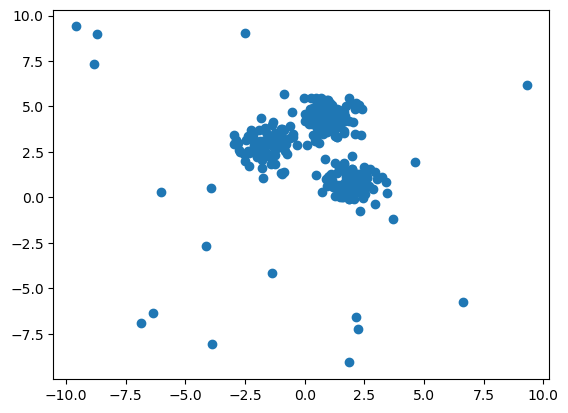

In [6]:
plt.scatter(x[:, 0], x[:, 1])

##### Apply K-Means clustering

In [7]:
from sklearn.cluster import KMeans

In [8]:
# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(x)
clusters = kmeans.predict(x)
centroids = kmeans.cluster_centers_
clusters

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1,
       2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2,

In [9]:
centroids

array([[ 1.95463133,  0.40183234],
       [-2.04049386,  2.72512801],
       [ 0.95855317,  4.41692928]])

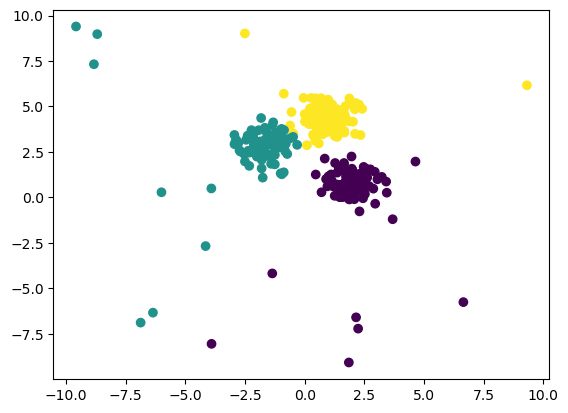

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=clusters)

In [24]:
# Step 3: Calculate the distance of each point to its nearest centroid
distances = np.linalg.norm(x - centroids[clusters], axis=1)
distances

array([ 0.76889504,  0.47299044,  0.47603464,  0.55601983,  0.59605436,
        0.72674326,  2.06349312,  0.81834785,  0.28997872,  1.70120362,
        1.22352009,  0.57069958,  1.24109666,  0.29707861,  0.19066356,
        0.59883383,  0.58459345,  0.81025928,  1.57768374,  0.64198194,
        0.3917587 ,  0.65850474,  0.66911596,  0.53301654,  0.60099294,
        0.09647853,  1.14251823,  0.10578099,  0.83569401,  1.37670313,
        0.86789423,  0.81252931,  1.14394957,  0.66426547,  0.60396074,
        0.68817075,  0.58235274,  1.7747604 ,  0.49154254,  1.21002563,
        0.97499873,  0.90320699,  0.76887964,  0.54547133,  0.34530211,
        0.66125105,  0.28690841,  1.65842464,  1.28775951,  0.31148895,
        0.39420142,  1.84987527,  0.97731195,  1.0279313 ,  0.57831738,
        0.5330036 ,  0.39514773,  1.15567049,  0.92783437,  1.21212244,
        0.55384758,  1.46842749,  0.39814874,  0.99273243,  0.69756259,
        0.92572855,  0.81401909,  0.73120462,  0.4669342 ,  0.77

In [26]:
# Step 4: Determine anomalies (e.g., points with distance greater than a threshold)
threshold = np.percentile(distances, 95)

# Top 5% farthest points are considered anomalies
anomalies = x[distances > threshold]

In [27]:
threshold

2.923185167483635

In [28]:
anomalies.shape

(16, 2)

##### Visualise the results

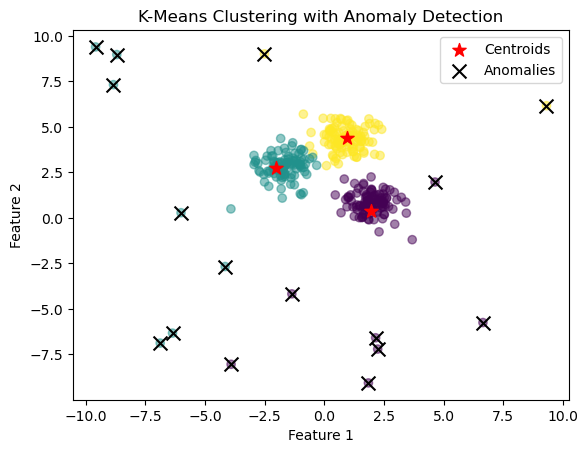

In [30]:
# Step 5: Visualize the results
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='*', label='Centroids')
plt.scatter(anomalies[:, 0], anomalies[:, 1], s=100, c='black', marker='x', label='Anomalies')
plt.title('K-Means Clustering with Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()